# The Dual Moving Average Crossover Algorithmic Trading Stategies

In this project we attempt to simulate The Dual Moving Average Crossover.

In [1]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 15.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [3]:
# import libraries
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.5, 8.5)

In [4]:
# initialise ticker class and download data
ticker_data = input("Enter symbol: ")
start = input("Enter Start date: ") # format: yyyy-mm-dd
end = input("Enter End date: ") # format: yyyy-mm-dd

ticker = yf.download(ticker_data, start=start, end=end)

ticker

Enter symbol: aapl
Enter Start date: 2020-01-01
Enter End date: 2023-02-16
Enter interval: 1d
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735313,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970100,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [5]:
# define portfolio balance
start_balance = int(input("Starting Portfolio Balance: \n$"))

Starting Portfolio Balance: 
$1000


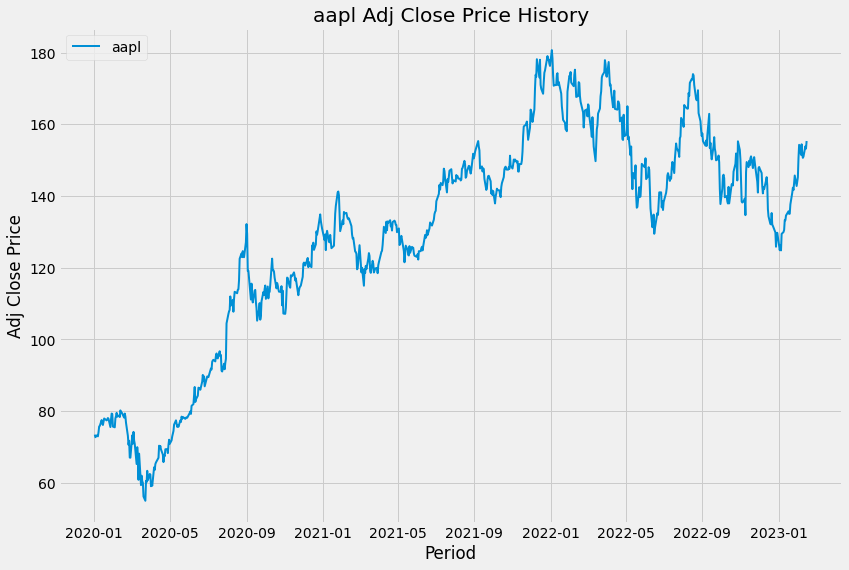

In [7]:
# plot data
plt.figure(figsize=(12.5, 8.5))
plt.plot(ticker['Adj Close'], label=ticker_data, linewidth=2)
plt.title(f"{ticker_data} Adj Close Price History")
plt.xlabel("Period")
plt.ylabel("Adj Close Price")
plt.legend(loc="upper left")
plt.show()

# Dual Moving Average Crossover Strategy

In [8]:
# short exponential moving average
ema_short = pd.DataFrame()
short_window = int(input("Input the short exponential moving average window: "))
ema_short[f"{short_window} day EMA"] = ticker["Adj Close"].ewm(span=short_window, adjust=False).mean()
ema_short

Input the short exponential moving average window: 12


,12 day EMA
Date,
2020-01-02,73.449394
2020-01-03,73.339536
2020-01-06,73.335744
2020-01-07,73.279491
2020-01-08,73.412475
...,...
2023-02-09,148.045743
2023-02-10,148.501782
2023-02-13,149.324586


In [9]:
# long exponential moving average
ema_long = pd.DataFrame()
long_window = int(input("Input the short exponential moving average window: "))
ema_long[f"{long_window} day EMA"] = ticker["Adj Close"].ewm(span=long_window, adjust=False).mean()
ema_long

Input the short exponential moving average window: 26


,26 day EMA
Date,
2020-01-02,73.449394
2020-01-03,73.396499
2020-01-06,73.390454
2020-01-07,73.359317
2020-01-08,73.417433
...,...
2023-02-09,143.572372
2023-02-10,144.123307
2023-02-13,144.843804


In [10]:
# store all data in new data frame
cross_data = pd.DataFrame()

cross_data[f"{ticker_data} Adj Close"] = ticker["Adj Close"]
cross_data[f"ema{short_window}"] = ema_short[f"{short_window} day EMA"]
cross_data[f"ema{long_window}"] = ema_long[f"{long_window} day EMA"]
cross_data

,aapl Adj Close,ema12,ema26
Date,,,
2020-01-02,73.449394,73.449394,73.449394
2020-01-03,72.735313,73.339536,73.396499
2020-01-06,73.314888,73.335744,73.390454
2020-01-07,72.970100,73.279491,73.359317
2020-01-08,74.143890,73.412475,73.417433
...,...,...,...
2023-02-09,150.639999,148.045743,143.572372
2023-02-10,151.009995,148.501782,144.123307
2023-02-13,153.850006,149.324586,144.843804


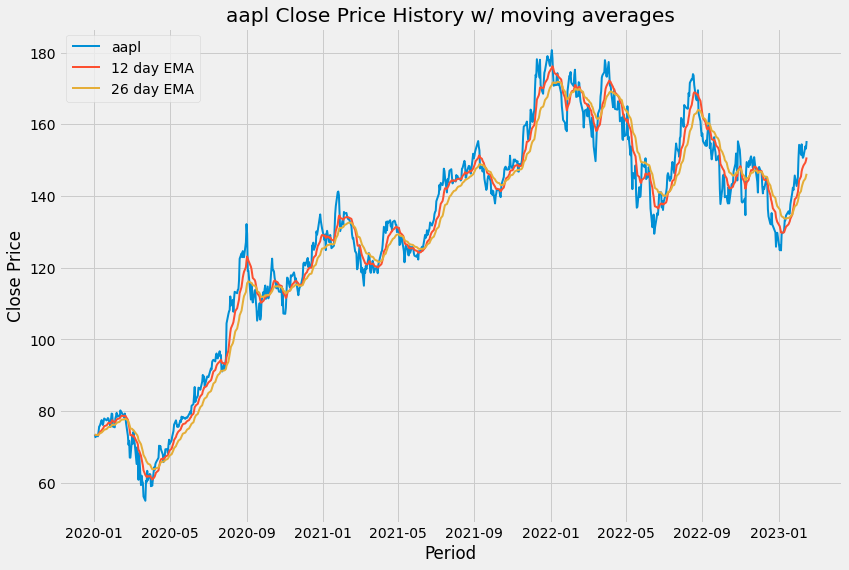

In [11]:
# Visualise data and strategy
plt.plot(ticker["Adj Close"], linewidth=2, label=f"{ticker_data}")
plt.plot(cross_data[f"ema{short_window}"], linewidth=2, label=f"{short_window} day EMA")
plt.plot(cross_data[f"ema{long_window}"], linewidth=2, label=f"{long_window} day EMA")
plt.title(f"{ticker_data} Close Price History w/ moving averages")
plt.xlabel("Period")
plt.ylabel("Close Price")
plt.legend(loc="upper left")
plt.show()

In [12]:
# calculate return and balance
cross_data["Daily Return"] = cross_data[f"{ticker_data} Adj Close"] / cross_data[f"{ticker_data} Adj Close"].shift(1)
cross_data["Daily Return"].iat[0] = 1
cross_data["Holding Balance"] = start_balance * cross_data["Daily Return"].cumprod()
cross_data

,aapl Adj Close,ema12,ema26,Daily Return,Holding Balance
Date,,,,,
2020-01-02,73.449394,73.449394,73.449394,1.000000,1000.000000
2020-01-03,72.735313,73.339536,73.396499,0.990278,990.277921
2020-01-06,73.314888,73.335744,73.390454,1.007968,998.168722
2020-01-07,72.970100,73.279491,73.359317,0.995297,993.474503
2020-01-08,74.143890,73.412475,73.417433,1.016086,1009.455437
...,...,...,...,...,...
2023-02-09,150.639999,148.045743,143.572372,0.993088,2050.935899
2023-02-10,151.009995,148.501782,144.123307,1.002456,2055.973315
2023-02-13,153.850006,149.324586,144.843804,1.018807,2094.639550


In [13]:
# Calculate Holding drawdown
cross_data["Holding Peak Balance"] = cross_data["Holding Balance"].cummax()
cross_data["Holding Drawdown"] = cross_data["Holding Balance"] - cross_data["Holding Peak Balance"]

holding_dd = round(((cross_data["Holding Drawdown"] / cross_data["Holding Peak Balance"]).min() * 100), 2)

holding_dd

-31.43

In [14]:
# set trading entries
cross_data["Long"] = cross_data[f"ema{short_window}"] > cross_data[f"ema{long_window}"]
cross_data["Short"] = cross_data[f"ema{short_window}"] < cross_data[f"ema{long_window}"]

In [15]:
# Output data
cross_data

,aapl Adj Close,ema12,ema26,Daily Return,Holding Balance,Holding Peak Balance,Holding Drawdown,Long,Short
Date,,,,,,,,,
2020-01-02,73.449394,73.449394,73.449394,1.000000,1000.000000,1000.000000,0.000000,False,False
2020-01-03,72.735313,73.339536,73.396499,0.990278,990.277921,1000.000000,-9.722079,False,True
2020-01-06,73.314888,73.335744,73.390454,1.007968,998.168722,1000.000000,-1.831278,False,True
2020-01-07,72.970100,73.279491,73.359317,0.995297,993.474503,1000.000000,-6.525497,False,True
2020-01-08,74.143890,73.412475,73.417433,1.016086,1009.455437,1009.455437,0.000000,False,True
...,...,...,...,...,...,...,...,...,...
2023-02-09,150.639999,148.045743,143.572372,0.993088,2050.935899,2459.977653,-409.041754,True,False
2023-02-10,151.009995,148.501782,144.123307,1.002456,2055.973315,2459.977653,-404.004338,True,False
2023-02-13,153.850006,149.324586,144.843804,1.018807,2094.639550,2459.977653,-365.338102,True,False


In [16]:
# Calcuate Strategy Return and Balance
cross_data["Strategy Return"] = np.where(cross_data["Long"]==True, cross_data["Daily Return"], 2-cross_data["Daily Return"])
cross_data["Strategy Balance"] = start_balance * cross_data["Strategy Return"].cumprod()
cross_data

,aapl Adj Close,ema12,ema26,Daily Return,Holding Balance,Holding Peak Balance,Holding Drawdown,Long,Short,Strategy Return,Strategy Balance
Date,,,,,,,,,,,
2020-01-02,73.449394,73.449394,73.449394,1.000000,1000.000000,1000.000000,0.000000,False,False,1.000000,1000.000000
2020-01-03,72.735313,73.339536,73.396499,0.990278,990.277921,1000.000000,-9.722079,False,True,1.009722,1009.722079
2020-01-06,73.314888,73.335744,73.390454,1.007968,998.168722,1000.000000,-1.831278,False,True,0.992032,1001.676341
2020-01-07,72.970100,73.279491,73.359317,0.995297,993.474503,1000.000000,-6.525497,False,True,1.004703,1006.387057
2020-01-08,74.143890,73.412475,73.417433,1.016086,1009.455437,1009.455437,0.000000,False,True,0.983914,990.198412
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09,150.639999,148.045743,143.572372,0.993088,2050.935899,2459.977653,-409.041754,True,False,0.993088,1895.136945
2023-02-10,151.009995,148.501782,144.123307,1.002456,2055.973315,2459.977653,-404.004338,True,False,1.002456,1899.791695
2023-02-13,153.850006,149.324586,144.843804,1.018807,2094.639550,2459.977653,-365.338102,True,False,1.018807,1935.520657


In [17]:
# calculate strategy drawdown
cross_data["Strategy Peak"] = cross_data["Strategy Balance"].cummax()
cross_data["Strategy Drawdown"] = cross_data["Strategy Balance"] - cross_data["Strategy Peak"]

strategy_dd = round((cross_data["Strategy Drawdown"] / cross_data["Strategy Peak"]).min() * 100, 2)

strategy_dd

-29.09

In [18]:
# calculate metrics
holding_return = round(((cross_data["Holding Balance"][-1] / cross_data["Holding Balance"][0]) - 1) * 100, 2)
strategy_return = round(((cross_data['Strategy Balance'][-1] / cross_data['Strategy Balance'][0]) - 1) * 100, 2)
strategy_in_market = round(((cross_data["Long"].value_counts().loc[True] / len(cross_data)) * 100)+ ((cross_data["Short"].value_counts().loc[True] / len(cross_data)) * 100))
strategy_win = cross_data["Strategy Balance"][cross_data["Strategy Balance"] > cross_data["Strategy Balance"].shift(-1)].count()
strategy_loss = cross_data["Strategy Balance"][cross_data["Strategy Balance"] < cross_data["Strategy Balance"].shift(-1)].count()
strategy_winrate = round(strategy_win / (strategy_win + strategy_loss) * 100, 2)

print(f"--------------{ticker_data} Metrics----------------")
print(f"Holding Total Return: {holding_return}%")
print(f"Holding Drawdown: {holding_dd}%")
print("")
print(f"Strategy Total Return: {strategy_return}%")
print(f"Strategy Drawdown: {strategy_dd}%")
print(f"Time in Market: {strategy_in_market}%")
print(f"Trades Won: {strategy_win}")
print(f"Trades Lost: {strategy_loss}")
print(f"Winrate: {strategy_winrate}%")

--------------aapl Metrics----------------
Holding Total Return: 111.48%
Holding Drawdown: -31.43%

Strategy Total Return: 95.41%
Strategy Drawdown: -29.09%
Time in Market: 100%
Trades Won: 379
Trades Lost: 405
Winrate: 48.34%


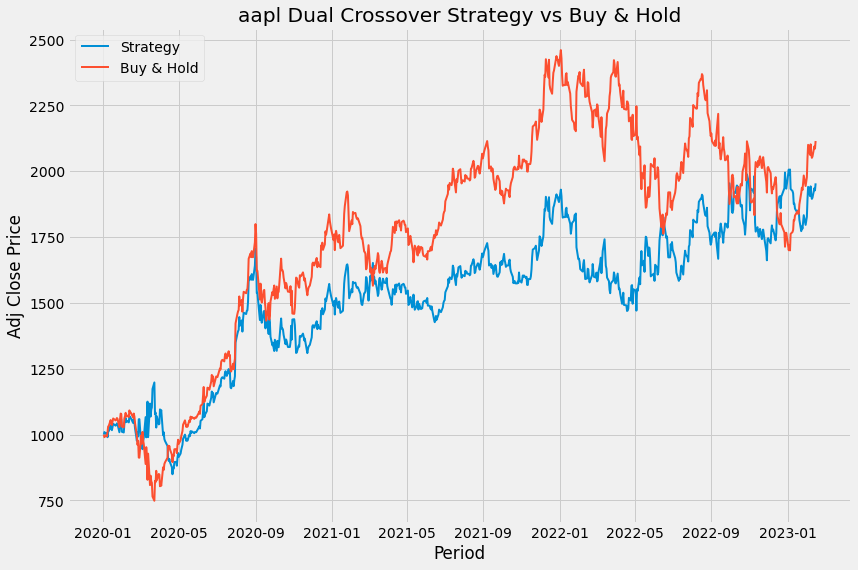

In [19]:
# Visualise data and strategy
#plt.figure(figsize=(12.5, 4.5))
plt.plot(cross_data["Strategy Balance"], linewidth=2, label="Strategy")
plt.plot(cross_data["Holding Balance"], linewidth=2, label="Buy & Hold")
plt.title(f"{ticker_data} Dual Crossover Strategy vs Buy & Hold")
plt.xlabel("Period")
plt.ylabel("Adj Close Price")
plt.legend(loc="upper left")
plt.show()